# Plot number of Events

In [1]:
import numpy as np
import pandas as pd
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pnsn_catalog_mtsthelens_50km.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.head()

,Number_of_Events
Date,
1980-01-07,1
1980-01-08,1
1980-01-25,1
1980-01-27,1
1980-02-09,1


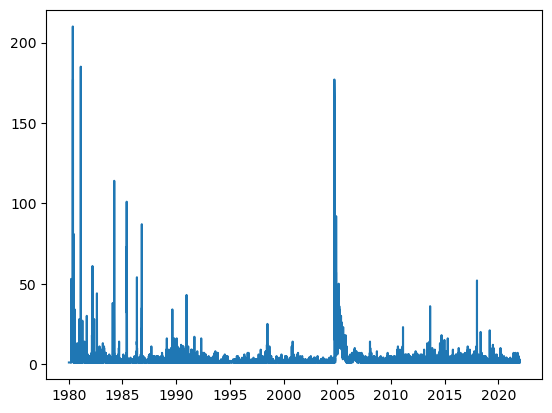

In [4]:
plt.plot(df)

Text(0, 0.5, 'Events per Day')

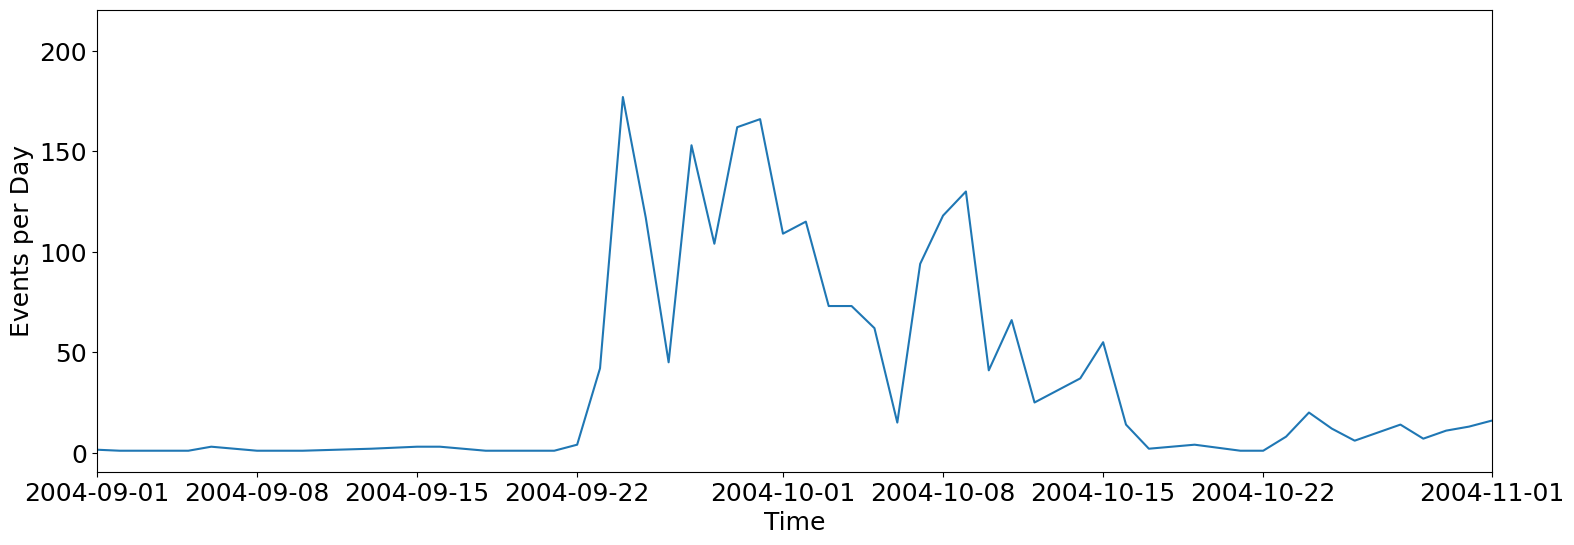

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df)
ax.set_xlim(UTCDateTime(2004,9,1),UTCDateTime(2004,11,1))
ax.set_xlabel("Time")
ax.set_ylabel("Events per Day")

In [59]:
df_res = df.resample('30D').sum()
df_res2 = df.resample('1D').sum()

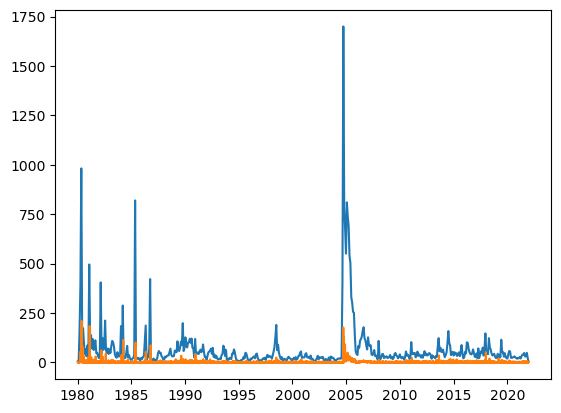

In [60]:
plt.plot(df_res.index, df_res['Number_of_Events'])
plt.plot(df_res2.index, df_res2['Number_of_Events'])

In [6]:
# load data
df = pd.read_csv("/home/koepflma/project1/Mt-St-Helens/MtStHelens_activity/pnsn_catalog_mtsthelens_50km_utc.csv")
df['UTC'] = [UTCDateTime(i) for i in df['timestamp']] # timestamp to obspy.UTCDateTime
df['event'] = 1 # add new row with ones
df = df.set_index('UTC') # set obspy.UTCDateTime to index
df = df.sort_index() # sort index
df.head()

,source_id,timestamp,event_type,year,month,day,doy,hour,minute,second,microsecond,latitude,longitude,depth,magnitude,magnitude_type,contributor,number_of_pick,dist,event
UTC,,,,,,,,,,,,,,,,,,,,
1980-01-07T17:52:25.170000Z,uw10074693,3.161155e+08,earthquake,1980,1,7,7,17,52,25,170000,46.455,-122.415,11.935,1.0,md,uw,10,37.880,1
1980-01-08T19:22:53.020000Z,uw10074723,3.162074e+08,earthquake,1980,1,8,8,19,22,53,20000,46.642,-122.271,14.953,1.5,md,uw,16,49.963,1
1980-01-25T22:44:40.520000Z,uw10074988,3.176883e+08,earthquake,1980,1,25,25,22,44,40,520000,46.572,-122.195,-1.315,0.8,md,uw,7,41.338,1
1980-01-27T05:20:19.460000Z,uw10075003,3.177984e+08,earthquake,1980,1,27,27,5,20,19,460000,46.283,-122.487,9.530,1.6,md,uw,11,34.418,1
1980-02-09T00:28:56.830000Z,uw10075403,3.189041e+08,earthquake,1980,2,9,40,0,28,56,830000,46.179,-122.174,-1.084,3.2,md,uw,18,2.904,1


In [7]:
# create a new df, only times of interest
st = UTCDateTime(year=2004, month=1, day=1)
et = UTCDateTime(year=2008, month=12, day=31)
df_cut = df[(df.index >= st) & (df.index <= et)]
df_cut.index = [i.datetime for i in df_cut.index] # index to datetime
df_cut

,source_id,timestamp,event_type,year,month,day,doy,hour,minute,second,microsecond,latitude,longitude,depth,magnitude,magnitude_type,contributor,number_of_pick,dist,event
2004-01-12 23:00:04.250,uw10599383,1.073948e+09,earthquake,2004,1,12,12,23,0,4,250000,46.318,-122.239,7.648,0.9,md,uw,18,14.216,1
2004-01-14 00:08:23.830,uw10599948,1.074039e+09,earthquake,2004,1,14,14,0,8,23,830000,46.200,-122.187,0.106,0.5,md,uw,13,0.211,1
2004-01-14 14:14:44.480,uw10600088,1.074090e+09,earthquake,2004,1,14,14,14,14,44,480000,46.025,-122.477,15.319,0.2,md,uw,8,37.534,1
2004-01-14 15:52:54.490,uw10600103,1.074096e+09,earthquake,2004,1,14,14,15,52,54,490000,46.210,-122.297,5.732,0.1,md,uw,11,12.079,1
2004-01-21 17:35:20.750,uw10602128,1.074707e+09,earthquake,2004,1,21,21,17,35,20,750000,46.482,-122.369,17.844,0.6,md,uw,13,37.184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24 13:30:54.370,uw10761273,1.230125e+09,earthquake,2008,12,24,359,13,30,54,370000,46.342,-122.204,8.951,0.7,md,uw,8,15.835,1
2008-12-24 23:31:47.430,uw10761283,1.230162e+09,earthquake,2008,12,24,359,23,31,47,430000,46.090,-122.514,12.600,0.6,md,uw,9,38.205,1
2008-12-27 15:59:14.740,uw10761933,1.230394e+09,earthquake,2008,12,27,362,15,59,14,740000,46.361,-122.305,17.535,1.0,md,uw,26,22.044,1
2008-12-29 17:27:49.770,uw10762713,1.230572e+09,earthquake,2008,12,29,364,17,27,49,770000,46.313,-122.236,7.699,0.6,md,uw,9,13.574,1


In [54]:
df_res = df_cut.resample('10min').sum()
df_roll = df_res.rolling('1H', center=True).mean()
# df_roll = df_cut.rolling('10min', center=True).sum()
df_res

,timestamp,year,month,day,doy,hour,minute,second,microsecond,latitude,longitude,depth,magnitude,number_of_pick,dist,event
2004-01-12 23:00:00,1.073948e+09,2004,1,12,12,23,0,4,250000,46.318,-122.239,7.648,0.9,18,14.216,1
2004-01-12 23:10:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
2004-01-12 23:20:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
2004-01-12 23:30:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
2004-01-12 23:40:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-29 22:20:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
2008-12-29 22:30:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
2008-12-29 22:40:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0
2008-12-29 22:50:00,0.000000e+00,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.0,0,0.000,0


Text(0, 0.5, '# events per 10 min')

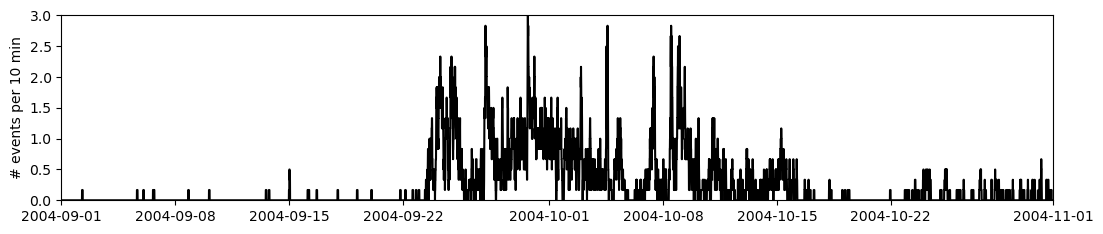

In [57]:
# plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(6.4*2,4.8*0.5))
plt.plot(df_roll.index,df_roll.event, color='k')
# plt.plot(df_res.index,df_res.event, alpha=0.8)
plt.xlim(UTCDateTime(2004,9,1), UTCDateTime(2004,11,1))
plt.ylim(0,3)
plt.ylabel('# events per 10 min')
# plt.savefig('pnsn_catalog_res10min_sum_roll1h_mean3.png', dpi=300, bbox_inches='tight')

In [28]:
df_res = df_cut.resample('10D').sum()
df_res

,timestamp,year,month,day,doy,hour,minute,second,microsecond,latitude,longitude,depth,magnitude,number_of_pick,dist,event
2004-01-12,5.370879e+09,10020,5,75,75,69,109,145,2800000,231.235,-611.569,46.649,2.30,63,101.224,5
2004-01-22,1.075287e+09,2004,1,28,28,10,54,3,960000,46.202,-122.189,0.422,1.30,12,0.171,1
2004-02-01,8.608799e+09,16032,16,50,298,115,123,249,4310000,370.145,-977.949,63.074,3.64,97,135.475,8
2004-02-11,2.154198e+09,4008,4,36,98,19,83,48,1010000,92.401,-244.374,-0.868,0.50,17,0.547,2
2004-02-21,5.389557e+09,10020,12,79,292,49,134,89,1790000,231.640,-611.407,41.675,1.90,75,105.170,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-16,4.908872e+09,8032,44,82,1302,37,159,42,2970000,184.036,-489.575,60.568,4.40,98,129.083,4
2008-11-26,1.350949e+10,22088,126,192,3697,110,317,227,6600000,509.154,-1344.969,100.364,7.93,169,210.078,11
2008-12-06,8.603476e+09,14056,84,83,2428,76,148,203,3820000,324.101,-855.211,60.141,4.35,101,112.577,7
2008-12-16,1.352818e+10,22088,132,228,3913,120,262,407,3930000,509.206,-1345.474,108.777,7.40,124,265.200,11


In [33]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (6.4,4.8) # if wider plot, only change first value.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']

Text(0, 0.5, '# events per 10 d')

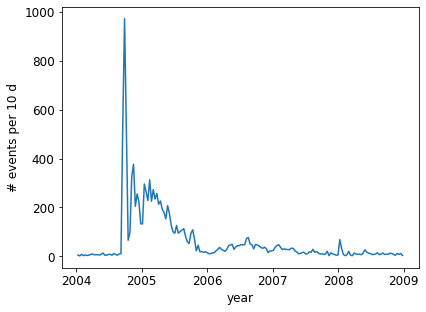

In [35]:
plt.plot(df_res.index,df_res.event)
plt.xlabel('year')
plt.ylabel('# events per 10 d')

In [17]:
df_roll = df_cut.resample('1H').sum().rolling('1D', center=True).sum()
df_roll

,timestamp,year,month,day,doy,hour,minute,second,microsecond,latitude,longitude,depth,magnitude,number_of_pick,dist,event
2004-01-12 23:00:00,1.073948e+09,2004.0,1.0,12.0,12.0,23.0,0.0,4.0,250000.0,46.318,-122.239,7.648,0.9,18.0,14.216,1.0
2004-01-13 00:00:00,1.073948e+09,2004.0,1.0,12.0,12.0,23.0,0.0,4.0,250000.0,46.318,-122.239,7.648,0.9,18.0,14.216,1.0
2004-01-13 01:00:00,1.073948e+09,2004.0,1.0,12.0,12.0,23.0,0.0,4.0,250000.0,46.318,-122.239,7.648,0.9,18.0,14.216,1.0
2004-01-13 02:00:00,1.073948e+09,2004.0,1.0,12.0,12.0,23.0,0.0,4.0,250000.0,46.318,-122.239,7.648,0.9,18.0,14.216,1.0
2004-01-13 03:00:00,1.073948e+09,2004.0,1.0,12.0,12.0,23.0,0.0,4.0,250000.0,46.318,-122.239,7.648,0.9,18.0,14.216,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-29 19:00:00,2.461164e+09,4016.0,24.0,58.0,728.0,40.0,36.0,94.0,1000000.0,92.750,-244.608,23.323,1.7,20.0,46.855,2.0
2008-12-29 20:00:00,2.461164e+09,4016.0,24.0,58.0,728.0,40.0,36.0,94.0,1000000.0,92.750,-244.608,23.323,1.7,20.0,46.855,2.0
2008-12-29 21:00:00,2.461164e+09,4016.0,24.0,58.0,728.0,40.0,36.0,94.0,1000000.0,92.750,-244.608,23.323,1.7,20.0,46.855,2.0
2008-12-29 22:00:00,2.461164e+09,4016.0,24.0,58.0,728.0,40.0,36.0,94.0,1000000.0,92.750,-244.608,23.323,1.7,20.0,46.855,2.0


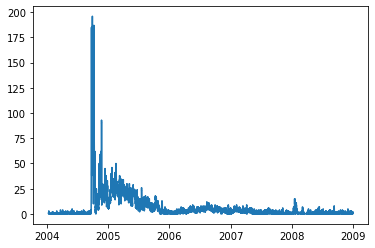

In [18]:
plt.plot(df_roll.index,df_roll.event)